In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank-marketing.csv')

In [4]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape


(45211, 19)

In [6]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [7]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [8]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [10]:
cat_col=df.select_dtypes(include=[np.object])
cat_col

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
0,management,married,tertiary,yes,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,yes,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,yes,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,yes,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,yes,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,yes,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,yes,no,no,no,telephone,nov,unknown,no


In [11]:
num_col=df.select_dtypes(include=[np.number])
num_col

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143,5,261,1,-1,0
1,44,60000,29,5,151,1,-1,0
2,33,120000,2,5,76,1,-1,0
3,47,20000,1506,5,92,1,-1,0
4,33,0,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0
45207,71,55000,1729,17,456,2,-1,0
45208,72,55000,5715,17,1127,5,184,3
45209,57,20000,668,17,508,4,-1,0


In [12]:
#Drop column "contact" which is useless
df = df.drop('contact', axis=1)

### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [13]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [14]:
print("Mean of the pdays", df['pdays'].mean())
print("Median of the pdays", df['pdays'].median())
print("Minimum of the pdays", df['pdays'].min())

Mean of the pdays 40.19782796222158
Median of the pdays -1.0
Minimum of the pdays -1


* The median of pdays column cannot be negative. Therefore it must be an outlier.

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [15]:
print("Mean of pdays", df[df['pdays'] != -1]['pdays'].mean())
print("Median of pdays", df[df['pdays'] != -1]['pdays'].median())

Mean of pdays 224.57769165556496
Median of pdays 194.0


* There is a huge difference between the mean and median values after skipping -1.

In [16]:
# Delete the rows which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
df = df.drop(df[condition].index, axis = 0, inplace = False)

df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

In [17]:
#  Drop customer values with 'other' education
condition3 = (df['education'] == 'other')
df = df.drop(df[condition3].index, axis = 0, inplace = False)

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

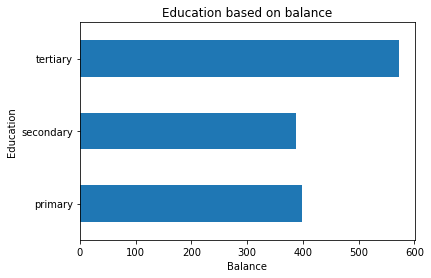

In [18]:
df.groupby('education')['balance'].median().plot.barh()
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Education based on balance')
plt.show()

* Teritary group has the highest median

### Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='pdays'>

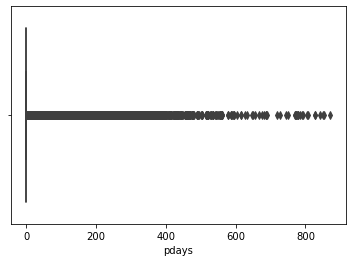

In [19]:
sns.boxplot(x=df['pdays'])

* yes, there are lots of outliers in pdays

##### Convert the response variable to a convenient form

In [20]:
df.response.replace({'no':0,'yes':1} ,inplace = True)

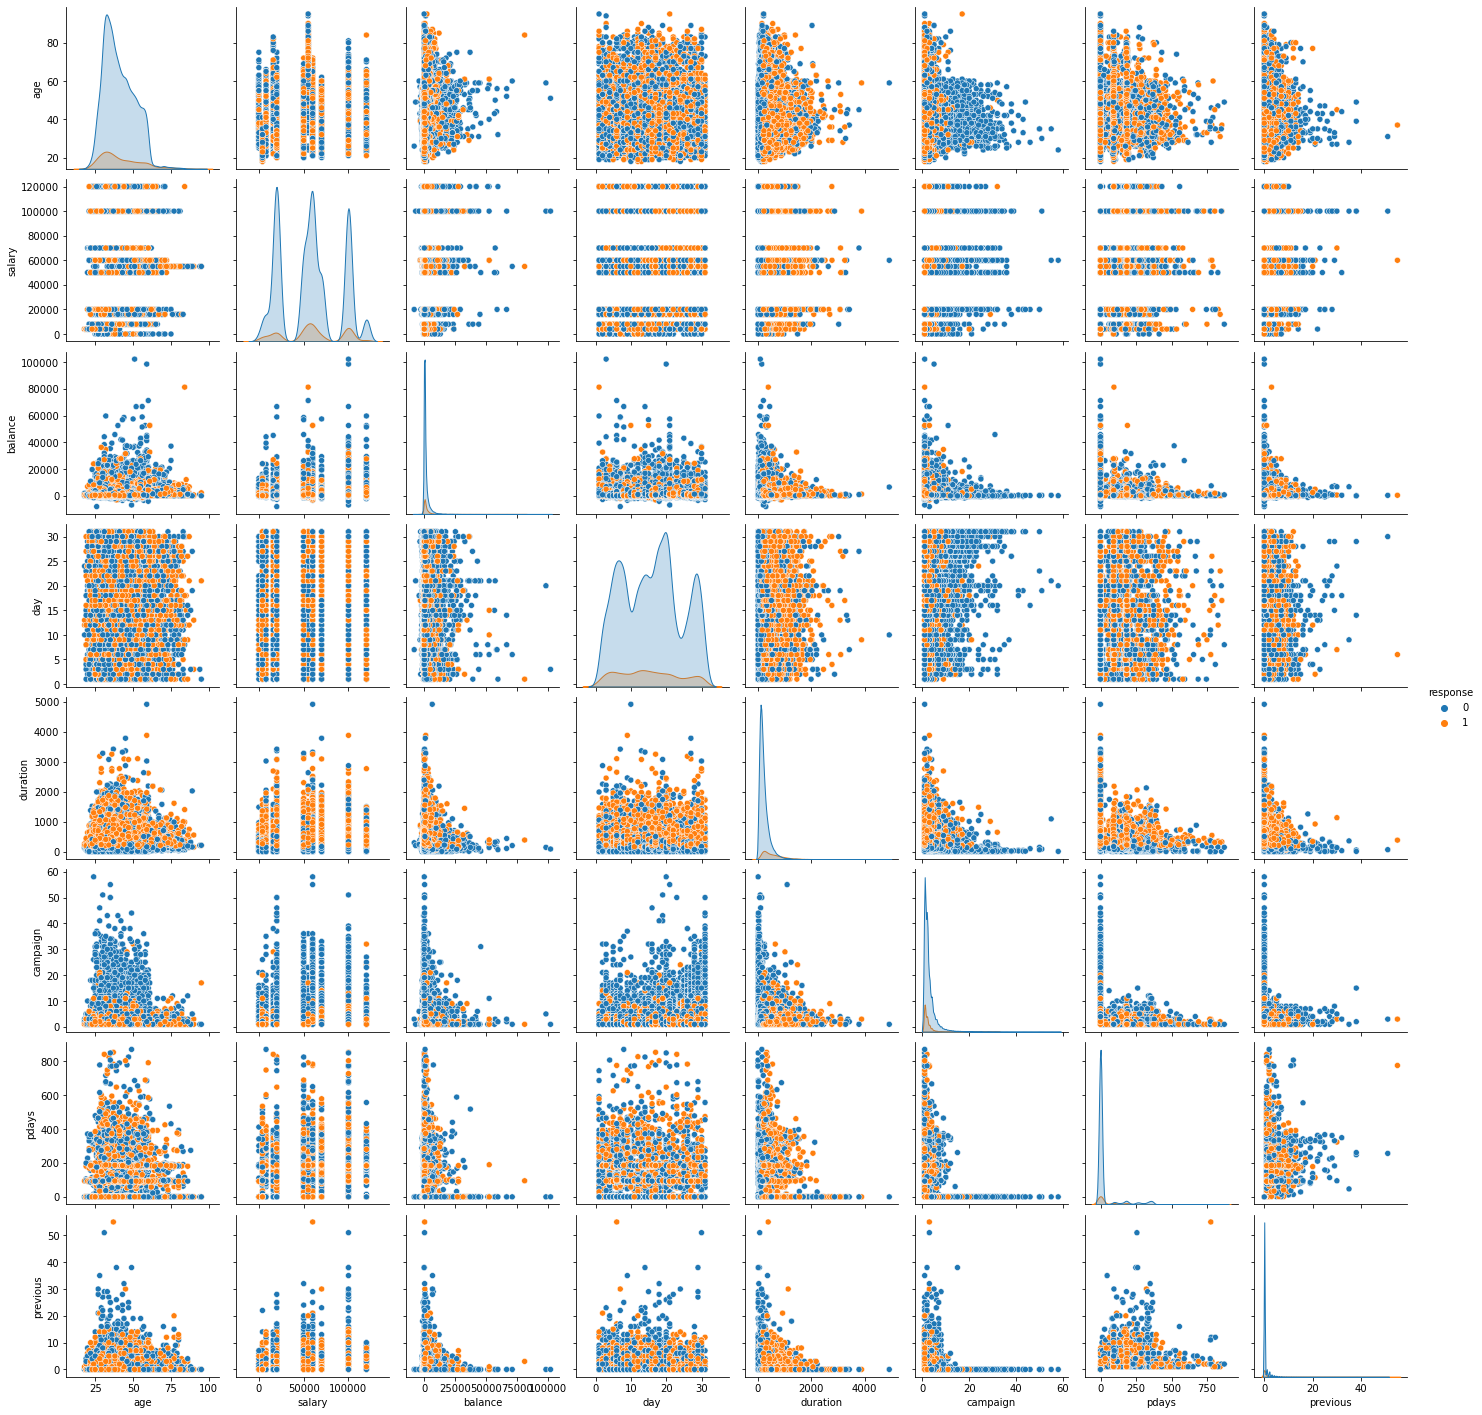

In [21]:
sns.pairplot(df, hue='response')

In [22]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.018033,0.093095,-0.011364,-0.007112,0.003330,-0.006804,0.011758,0.023427
salary,0.018033,1.000000,0.057967,0.027891,-0.013071,0.019080,-0.009446,0.017003,0.019360
balance,0.093095,0.057967,1.000000,0.001067,0.018145,-0.015019,0.004921,0.018199,0.047087
day,-0.011364,0.027891,0.001067,1.000000,-0.032326,0.171442,-0.088950,-0.055931,-0.035055
duration,-0.007112,-0.013071,0.018145,-0.032326,1.000000,-0.081231,-0.000144,0.004518,0.400108
campaign,0.003330,0.019080,-0.015019,0.171442,-0.081231,1.000000,-0.094268,-0.051489,-0.072117
pdays,-0.006804,-0.009446,0.004921,-0.088950,-0.000144,-0.094268,1.000000,0.568625,0.108631
previous,0.011758,0.017003,0.018199,-0.055931,0.004518,-0.051489,0.568625,1.000000,0.128706
response,0.023427,0.019360,0.047087,-0.035055,0.400108,-0.072117,0.108631,0.128706,1.000000


<AxesSubplot:>

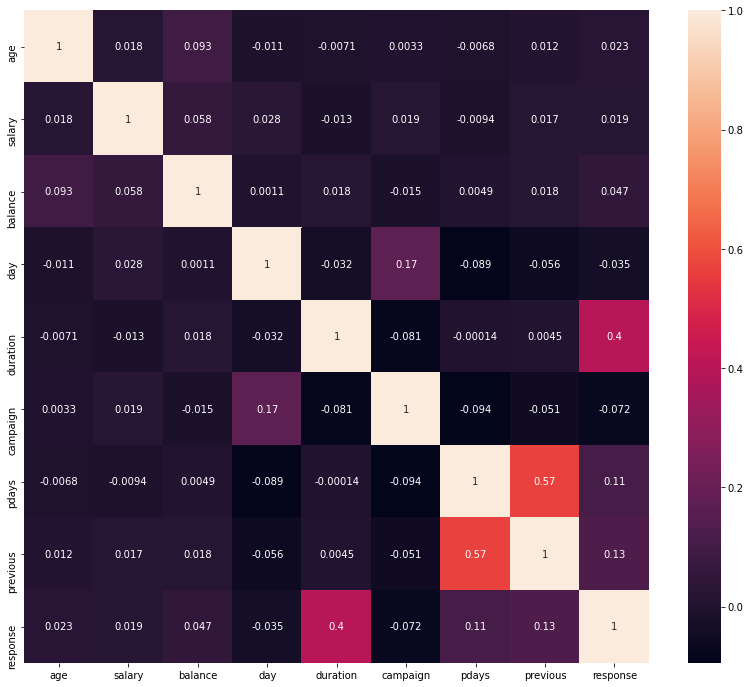

In [23]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

### First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.
Make suitable plots for associations with numerical features and categorical features’

Categorical columns

<AxesSubplot:xlabel='response', ylabel='count'>

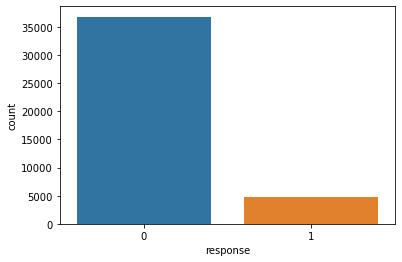

In [24]:
sns.countplot(x='response', data=df)

<AxesSubplot:xlabel='count', ylabel='job'>

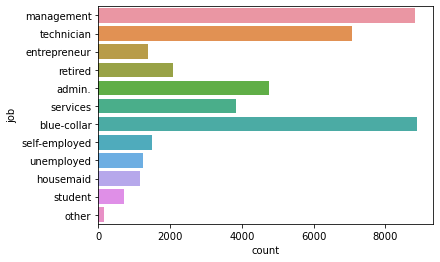

In [25]:
sns.countplot(y='job', data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

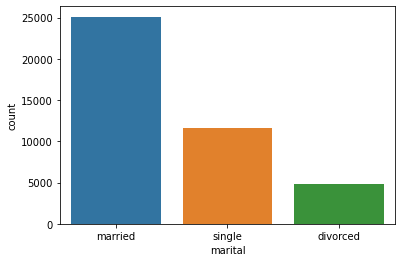

In [26]:
sns.countplot(x='marital', data=df)

<AxesSubplot:xlabel='count', ylabel='education'>

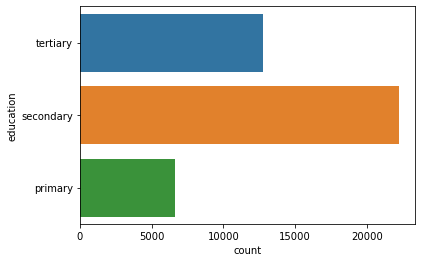

In [27]:
sns.countplot(y='education', data=df)

Numerical columns

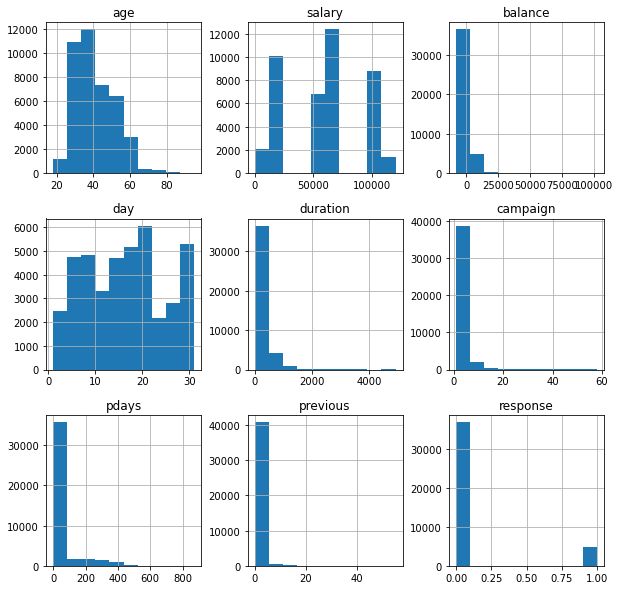

In [28]:
dist=df.hist(figsize=(10,10))

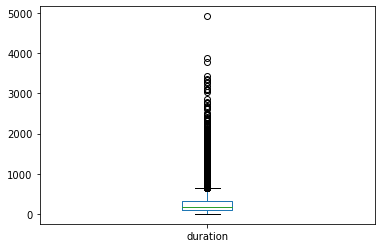

In [29]:
dist_dur = df['duration'].plot(kind = 'box')

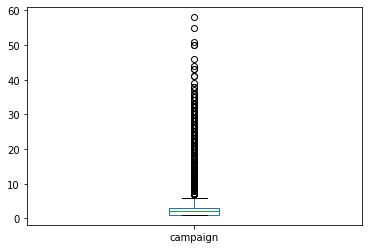

In [30]:
disr_cam=df['campaign'].plot(kind = 'box')

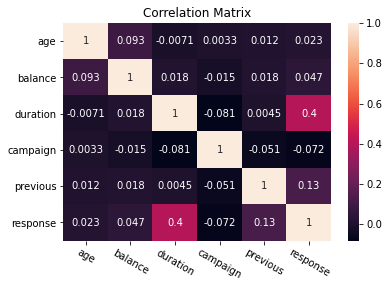

In [31]:
corr_data = df[['age','balance','duration','campaign','month','previous','response']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [32]:
high_corr_variables = ['poutcome']
for var in high_corr_variables:
    df[var + '_co'] = (df[var] == 'unknown').astype(int)

In [33]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    a=pd.concat(dataframes,axis=1)
    a.columns=edu
    a=a.fillna(0)
    return a

cross_tab(df,'job','education')

,tertiary,secondary,primary
job,,,
admin.,548,4013,201
blue-collar,146,5132,3616
entrepreneur,668,529,177
housemaid,169,385,618
management,7463,1082,288
other,39,70,51
retired,359,949,759
self-employed,796,558,127
services,193,3307,332


### Are the features about the previous campaign data useful?


In [34]:
df['campaign'].describe()

count    41579.000000
mean         2.773034
std          3.104747
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

In [35]:
df['previous'].describe()

count    41579.000000
mean         0.436999
std          1.569066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         55.000000
Name: previous, dtype: float64

### Are pdays and poutcome associated with the target?

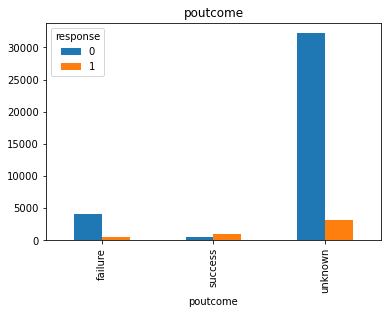

In [36]:
pd.crosstab(df['poutcome'],df['response']).plot.bar()
plt.title('poutcome');

* Poutcome is not associated with the target

In [37]:
df.drop('poutcome',axis=1,inplace=True)

In [38]:
df['pdays'].value_counts()

-1      35420
 182      134
 92       128
 183      109
 91       108
        ...  
 686        1
 526        1
 46         1
 749        1
 32         1
Name: pdays, Length: 517, dtype: int64

In [39]:
df1 = df[df.pdays != -1]

### The necessary transformations for the categorical variables and the numeric variables

Converting categorical data into dummy variables

In [40]:
lst=['housing','default','loan','targeted']



def conver(x):
    return x.map({'no':0,'yes':1})

for i in lst:
    df[[i]]=df[[i]].apply(conver)

lst=['job','education','marital','month']
for i in lst:
    dummy=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    df.drop([i],axis=1,inplace=True)

In [41]:
df.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,100000,1,0,2143,1,0,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,60000,1,0,29,1,0,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,120000,1,0,2,1,1,5,76,1,...,0,0,0,0,0,0,1,0,0,0
5,35,100000,1,0,231,1,0,5,139,1,...,0,0,0,0,0,0,1,0,0,0
6,28,100000,0,0,447,1,1,5,217,1,...,0,0,0,0,0,0,1,0,0,0


In [42]:
df.columns

Index(['age', 'salary', 'targeted', 'default', 'balance', 'housing', 'loan',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'response',
       'poutcome_co', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'other', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'secondary', 'tertiary', 'married',
       'single', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')

### Handle variables corresponding to the previous campaign

In [43]:
df.response

0        0
1        0
2        0
5        0
6        0
        ..
45205    1
45206    1
45207    1
45208    1
45209    0
Name: response, Length: 41579, dtype: int64

### Train test split

In [44]:
X=df.drop('response', axis=1)
Y=df['response']

### Predictive model 1: Logistic regression

Make a predictive model using logistic regression¶

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [46]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=100)

#### Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [47]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
df.select_dtypes(include=[np.number])

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,100000,1,0,2143,1,0,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,60000,1,0,29,1,0,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,120000,1,0,2,1,1,5,76,1,...,0,0,0,0,0,0,1,0,0,0
5,35,100000,1,0,231,1,0,5,139,1,...,0,0,0,0,0,0,1,0,0,0
6,28,100000,0,0,447,1,1,5,217,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,60000,1,0,505,0,1,17,386,2,...,0,0,0,0,0,0,0,1,0,0
45206,51,60000,1,0,825,0,0,17,977,3,...,0,0,0,0,0,0,0,1,0,0
45207,71,55000,1,0,1729,0,0,17,456,2,...,0,0,0,0,0,0,0,1,0,0
45208,72,55000,1,0,5715,0,0,17,1127,5,...,0,0,0,0,0,0,0,1,0,0


In [49]:

from sklearn.linear_model import LogisticRegression



In [50]:
log_reg = LogisticRegression()

In [51]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [52]:
rfe = RFE(log_reg, 10)
rfe = rfe.fit(X_train, Y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['housing', 'poutcome_co', 'student', 'dec', 'jan', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')

In [53]:

# Creating  dataframe with RFE selected variables

X_train_rfe = X_train[rfe_]

In [54]:
def build_model(X,y):
    X = sm.add_constant(X) 
    #Ading constant
    log_reg = sm.OLS(y,X).fit() 
    print(log_reg.summary()) #summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [55]:
x_train_new = build_model(X_train_rfe,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     338.0
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:29:39   Log-Likelihood:                -7599.6
No. Observations:               33263   AIC:                         1.522e+04
Df Residuals:                   33252   BIC:                         1.531e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2653      0.005     51.068      

In [56]:
X_train_rfe

,housing,poutcome_co,student,dec,jan,mar,may,nov,oct,sep
12095,1,1,0,0,0,0,0,0,0,0
6751,1,1,0,0,0,0,1,0,0,0
28653,0,1,0,0,1,0,0,0,0,0
17711,1,1,0,0,0,0,0,0,0,0
42254,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
17096,1,1,0,0,0,0,0,0,0,0
88,1,1,0,0,0,0,1,0,0,0
12787,0,1,0,0,0,0,0,0,0,0
14886,0,1,0,0,0,0,0,0,0,0


In [57]:
checkVIF(x_train_new)

,Features,VIF
0,const,9.71
7,may,1.33
1,housing,1.26
8,nov,1.08
2,poutcome_co,1.05
5,jan,1.03
9,oct,1.03
10,sep,1.03
3,student,1.01
4,dec,1.01


In [58]:
x_train_new = x_train_new.drop('const',axis=1)

In [59]:
checkVIF(x_train_new)

,Features,VIF
0,housing,2.49
1,poutcome_co,1.99
6,may,1.88
7,nov,1.13
4,jan,1.03
2,student,1.02
5,mar,1.01
8,oct,1.01
9,sep,1.01
3,dec,1.00


In [60]:
x_train_new = x_train_new.drop('housing',axis=1)

In [61]:
x_train_new = build_model(x_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     342.7
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:29:40   Log-Likelihood:                -7734.4
No. Observations:               33263   AIC:                         1.549e+04
Df Residuals:                   33253   BIC:                         1.557e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2348      0.005     48.188      

In [62]:
x_train_new = x_train_new.drop(columns=['jan'])

In [63]:
checkVIF(x_train_new)

,Features,VIF
0,const,8.19
5,may,1.07
6,nov,1.06
1,poutcome_co,1.04
7,oct,1.02
8,sep,1.02
2,student,1.01
3,dec,1.01
4,mar,1.01


In [64]:
x_train_new = build_model(x_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     383.2
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:29:40   Log-Likelihood:                -7742.9
No. Observations:               33263   AIC:                         1.550e+04
Df Residuals:                   33254   BIC:                         1.558e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2312      0.005     48.232      

In [65]:
x_train_new = x_train_new.drop('const',axis=1)

In [66]:
checkVIF(x_train_new)

,Features,VIF
0,poutcome_co,1.51
4,may,1.39
5,nov,1.09
1,student,1.02
3,mar,1.01
6,oct,1.01
7,sep,1.01
2,dec,1.00


In [67]:
x_train_new = x_train_new.drop(columns=['nov'])

In [88]:
checkVIF(x_train_new)

,Features,VIF
0,poutcome_co,1.39
4,may,1.36
1,student,1.02
3,mar,1.01
5,oct,1.01
6,sep,1.01
2,dec,1.00


In [68]:
temp=list(x_train_new.columns)

In [69]:
lm = LogisticRegression()
lm.fit(X_train[temp],Y_train)

LogisticRegression()

##### Estimate the model performance using k fold cross validation

In [78]:
auc=[X_train,X_train[temp]]
results_c = []
names_c = []
models = []
models.append(('LogisticRegression', LogisticRegression()))
for i in auc:
        kfold = KFold(n_splits=10, random_state=100)    
        
        cv_results = cross_val_score(LogisticRegression(), i, Y_train, cv=kfold, scoring='accuracy')    
        results_c.append(cv_results)
        names_c.append(__name__)
        msg = "%s: %f (%f)" % (LogisticRegression, cv_results.mean(), cv_results.std())
        print(msg)

<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.889667 (0.005390)
<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.885819 (0.004339)


In [80]:
predictions = log_reg.predict(X_test)
pred_selected=lm.predict(X_test[temp])

#### What is the precision, recall, accuracy of your model?

In [81]:
print('For all features')
print(accuracy_score(Y_test, predictions))
print('For selected features')
print(accuracy_score(Y_test, pred_selected))

For all features
0.8944203944203944
For selected features
0.8914141414141414


In [85]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, predictions))

[[7286  116]
 [ 762  152]]


In [86]:
# Classification Report
from sklearn.metrics import classification_report
print('This is for all features')
print(classification_report(Y_test, predictions))

This is for all features
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7402
           1       0.57      0.17      0.26       914

    accuracy                           0.89      8316
   macro avg       0.74      0.58      0.60      8316
weighted avg       0.87      0.89      0.87      8316



In [87]:
print('This is for selected features')
print(classification_report(Y_test, pred_selected))

This is for selected features
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7402
           1       0.54      0.09      0.15       914

    accuracy                           0.89      8316
   macro avg       0.72      0.54      0.55      8316
weighted avg       0.86      0.89      0.86      8316



#### Which features are the most important from your model?

poutcome_co,may,student,mar,oct,sept,dec

### Predictive model 2: Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
model = RandomForestClassifier(n_estimators=18)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=18)

In [93]:
Y_pred=model.predict(X_test)
conf_mat=confusion_matrix(Y_test,Y_pred)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(conf_mat,index=index,columns=columns)
demo

,predicted no,predicted yes
actual No,7209,193
actual yes,598,316


In [94]:
from sklearn.metrics import *

In [95]:
print('Recall score',round(recall_score(Y_test,Y_pred),2))
print('Precision score',round(precision_score(Y_test,Y_pred),2))

Recall score 0.35
Precision score 0.62


In [96]:
a=[X_train,X_train[temp]]

In [97]:
for i in a:
    kfold = KFold(n_splits=10, random_state=7)    
    cv_results = cross_val_score(LogisticRegression(), i, Y_train, cv=kfold, scoring='accuracy')  
    print('Cross validation score:',cv_results.mean())

Cross validation score: 0.8896671685824232
Cross validation score: 0.8858187923259846


Cross validation score(for all features): 0.8896671685824232
Cross validation score(for selected features):0.8858187923259846bb

In [100]:
model_s = RandomForestClassifier(n_estimators=18)
model_s.fit(X_train[temp], Y_train)

RandomForestClassifier(n_estimators=18)

In [105]:
Y_pred_=model_s.predict(X_test[temp])

In [106]:
print('For all features')
print(accuracy_score(Y_test, Y_pred))
print('For selected features')
print(accuracy_score(Y_test, Y_pred_))

For all features
0.9048821548821548
For selected features
0.8923761423761424


In [102]:
# this is for all for all features
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7402
           1       0.62      0.35      0.44       914

    accuracy                           0.90      8316
   macro avg       0.77      0.66      0.70      8316
weighted avg       0.89      0.90      0.89      8316



In [108]:
# this is for all for selected features
print(classification_report(Y_test, Y_pred_))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7402
           1       0.55      0.12      0.20       914

    accuracy                           0.89      8316
   macro avg       0.72      0.56      0.57      8316
weighted avg       0.86      0.89      0.86      8316



#### Compare the performance of the Random Forest and the logistic model 

Accuracy score for selected features when we use logistic model is 0.8944 and when we use Random forest model is 0.8923
Precision score for selected features when we use logistic model is  0.54and when we use Random forest model is 0.62
Cross val score for selected features when we use logistic model is 0.88557 and when we use Random forest model is 0.8858

#### Which metric did you choose and why?

k fold cross validation is been used


#### Which model has better performance on the test set? 
Logistic has got better accuracy score compared to random forset, hence we can say that it has better performance